Exercise & Energy: Finding the Best Workouts for Every Body

1. Introduction & Objective

This project analyzes calorie burned across various physical activities, helping individuals understand how different exercises impact calories burn based on their body weight and between type of excercises. Through data-driven insights, visualizations, and statistical analysis, we explore the most and least effective workouts for calorie consumption.

In [4]:
# Import liabrairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import os

2. Load Data & Initial Exploration

In [5]:
# Load the Data
calories_data = Path('../data/exercise_dataset.csv')

In [6]:
# Read the CSV file.
calories_df = pd.read_csv(calories_data)
calories_df

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236


In [7]:
# Get dataset information (data types, nulls, memory usage)
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Activity, Exercise or Sport (1 hour)  248 non-null    object 
 1   130 lb                                248 non-null    int64  
 2   155 lb                                248 non-null    int64  
 3   180 lb                                248 non-null    int64  
 4   205 lb                                248 non-null    int64  
 5   Calories per kg                       248 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 11.8+ KB


In [8]:
# Check column names for consistency
calories_df.columns

Index(['Activity, Exercise or Sport (1 hour)', '130 lb', '155 lb', '180 lb',
       '205 lb', 'Calories per kg'],
      dtype='object')

In [9]:
# Calculate summary statistics (mean, median, std)
calories_df.describe()

,130 lb,155 lb,180 lb,205 lb,Calories per kg
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,389.754032,464.689516,539.685484,614.620968,1.359930
std,194.434028,232.019135,269.430029,306.847470,0.678851
min,89.000000,106.000000,123.000000,140.000000,0.310067
25%,236.000000,281.000000,327.000000,372.000000,0.823236
50%,354.000000,422.000000,490.000000,558.000000,1.234853
75%,472.000000,563.000000,654.000000,745.000000,1.647825
max,1062.000000,1267.000000,1471.000000,1675.000000,3.706591


3. Data Cleaning & Transformation

In [10]:
# Rename column headers to make them easier to use.
calories_df = calories_df.rename(columns={
    "Activity, Exercise or Sport (1 hour)": "Excercises"}
    )

In [11]:
# check for renamed columns
calories_df.columns

Index(['Excercises', '130 lb', '155 lb', '180 lb', '205 lb',
       'Calories per kg'],
      dtype='object')

In [12]:
# check for missing values
calories_df.isnull().sum()

Excercises         0
130 lb             0
155 lb             0
180 lb             0
205 lb             0
Calories per kg    0
dtype: int64

In [13]:
# Set 'Excercises' as the index
calories_df.set_index("Excercises", inplace=True)

In [14]:
# Drop duplicate rows if any
calories_df = calories_df.drop_duplicates()


In [15]:
# Convert all numeric columns from string to float (forcing float type) and round to 2 decimal places
numeric_columns = ["130 lb", "155 lb", "180 lb", "205 lb", "Calories per kg"]

calories_df[numeric_columns] = calories_df[numeric_columns].astype(float).round(2)

# Display the updated data types to confirm conversion
print(calories_df.dtypes)

130 lb             float64
155 lb             float64
180 lb             float64
205 lb             float64
Calories per kg    float64
dtype: object


4. Categorizing Exercises into Types

In [16]:
# Create a function to categorize exercises based on their names

def categorize_exercise(activity):
    activity = activity.lower()
    if "walk" in activity:
        return "Walking"
    elif "run" in activity or "jog" in activity or "sprint" in activity:
        return "Running"
    elif "cycle" in activity or "bike" in activity or "cycling" in activity or "stationary" in activity:
        return "Cycling"
    elif "swim" in activity:
        return "Swimming"
    elif "weight" in activity or "lifting" in activity or "resistance" in activity:
        return "Strength Training"
    elif "yoga" in activity or "stretch" in activity or "pilates" in activity:
        return "Yoga & Flexibility"
    elif "basketball" in activity or "football" in activity or "soccer" in activity or "tennis" in activity:
        return "Sports"
    elif "cleaning" in activity or "gardening" in activity or "cooking" in activity:
        return "Household Activities"
    elif "aerobics" in activity or "stair" in activity or "jump rope" in activity:
        return "Cardio"
    else:
        return "Other"

# Apply function to create a new 'Exercise_Category' column
calories_df["Exercise_Category"] = calories_df.index.map(categorize_exercise)

# Display first few rows to confirm categorization
calories_df


,130 lb,155 lb,180 lb,205 lb,Calories per kg,Exercise_Category
Excercises,,,,,,
"Cycling, mountain bike, bmx",502.0,598.0,695.0,791.0,1.75,Cycling
"Cycling, <10 mph, leisure bicycling",236.0,281.0,327.0,372.0,0.82,Cycling
"Cycling, >20 mph, racing",944.0,1126.0,1308.0,1489.0,3.29,Cycling
"Cycling, 10-11.9 mph, light",354.0,422.0,490.0,558.0,1.23,Cycling
"Cycling, 12-13.9 mph, moderate",472.0,563.0,654.0,745.0,1.65,Cycling
"Cycling, 14-15.9 mph, vigorous",590.0,704.0,817.0,931.0,2.06,Cycling
"Cycling, 16-19 mph, very fast, racing",708.0,844.0,981.0,1117.0,2.47,Cycling
Unicycling,295.0,352.0,409.0,465.0,1.03,Cycling
"Stationary cycling, very light",177.0,211.0,245.0,279.0,0.62,Cycling


In [17]:
# Display how many exercises fall into each category
calories_df["Exercise_Category"].value_counts()

Exercise_Category
Cycling               13
Other                  6
Running                6
Walking                5
Cardio                 2
Yoga & Flexibility     1
Name: count, dtype: int64

In [18]:
# Group by Exercise Category and calculate the average calorie burn for each weight category
category_summary = calories_df.groupby("Exercise_Category")[
    ["130 lb", "155 lb", "180 lb", "205 lb"]
].mean()

# Display the grouped summary
category_summary.round(2)

,130 lb,155 lb,180 lb,205 lb
Exercise_Category,,,,
Cardio,457.50,545.00,633.0,721.50
Cycling,490.31,584.62,679.0,773.08
Other,357.33,425.83,494.5,563.33
Running,816.33,973.50,1130.5,1287.33
Walking,232.60,277.20,322.0,366.60
Yoga & Flexibility,148.00,176.00,204.0,233.00


<Figure size 1200x600 with 0 Axes>

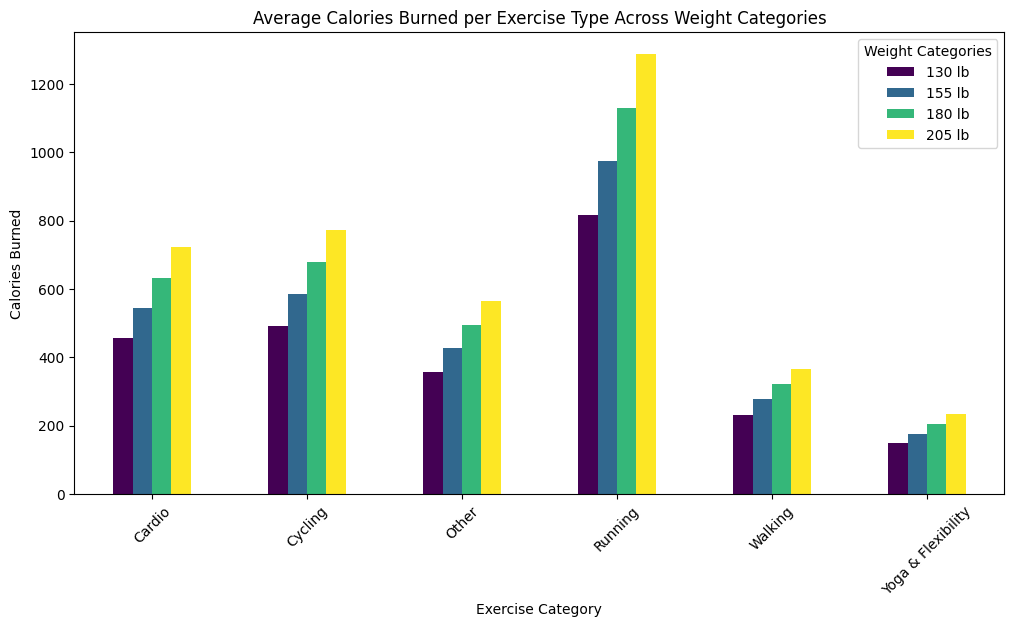

In [19]:
# Plot the average calorie burn for each exercise category across weight categories
plt.figure(figsize=(12, 6))
category_summary.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Average Calories Burned per Exercise Type Across Weight Categories")
plt.xlabel("Exercise Category")
plt.ylabel("Calories Burned")
plt.xticks(rotation=45)
plt.legend(title="Weight Categories")
plt.show()

In [20]:
# Calculate percentage increase from 130 lb to 205 lb
calories_df["Percentage_Increase_130_to_205"] = ((calories_df["205 lb"] - calories_df["130 lb"]) / calories_df["130 lb"]) * 100

# Display top exercises where weight has the most impact
calories_df.sort_values(by="Percentage_Increase_130_to_205", ascending=False).head(10)

,130 lb,155 lb,180 lb,205 lb,Calories per kg,Exercise_Category,Percentage_Increase_130_to_205
Excercises,,,,,,,
"Standing, playing with children, light",165.0,197.0,229.0,261.0,0.58,Other,58.181818
"Walking 3.5 mph, brisk pace",224.0,267.0,311.0,354.0,0.78,Walking,58.035714
"Cycling, 12-13.9 mph, moderate",472.0,563.0,654.0,745.0,1.65,Cycling,57.838983
Stair machine,531.0,633.0,735.0,838.0,1.85,Cardio,57.815443
"Cycling, 14-15.9 mph, vigorous",590.0,704.0,817.0,931.0,2.06,Cycling,57.796610
"Running, 6.7 mph (9 min mile)",649.0,774.0,899.0,1024.0,2.27,Running,57.781202
"Cycling, 16-19 mph, very fast, racing",708.0,844.0,981.0,1117.0,2.47,Cycling,57.768362
"Running, 8.6 mph (7 min mile)",826.0,985.0,1144.0,1303.0,2.88,Running,57.748184
"Running, 9 mph (6.5 min mile)",885.0,1056.0,1226.0,1396.0,3.09,Running,57.740113


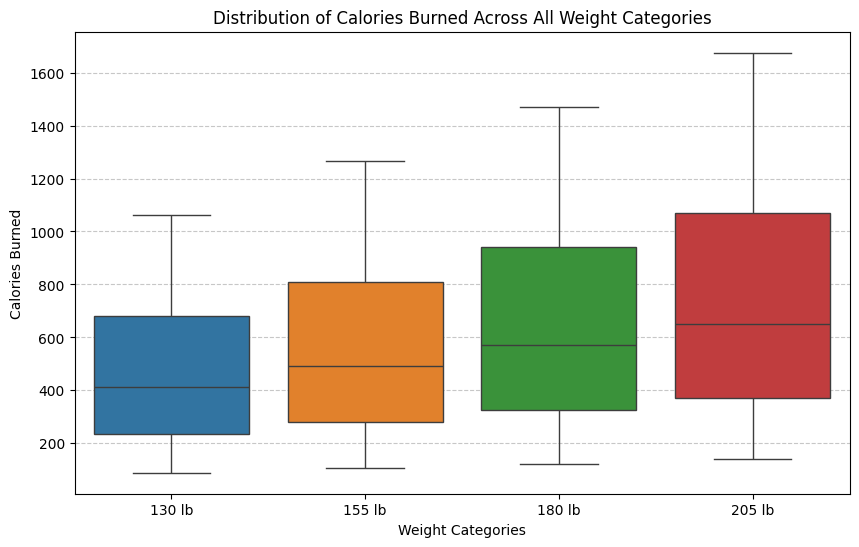

In [21]:
# Boxplot to Identify Outliers for All Weight Categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=calories_df[["130 lb", "155 lb", "180 lb", "205 lb"]])

# Customize the plot
plt.title("Distribution of Calories Burned Across All Weight Categories")
plt.xlabel("Weight Categories")
plt.ylabel("Calories Burned")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


5. Descriptive Statistics & Basic Insights

Find the highest & lowest calorie-burning exercises for each weight category.

In [22]:
# Get the exercise with the highest calories burned for each weight category
highest_calories = calories_df.nlargest(1, columns=['130 lb', '155 lb', '180 lb', '205 lb'])
print("Highest Calorie-Burning Exercises:")
print(highest_calories)


Highest Calorie-Burning Exercises:
                                  130 lb  155 lb  180 lb  205 lb  \
Excercises                                                         
Running, 10.9 mph (5.5 min mile)  1062.0  1267.0  1471.0  1675.0   

                                  Calories per kg Exercise_Category  \
Excercises                                                            
Running, 10.9 mph (5.5 min mile)             3.71           Running   

                                  Percentage_Increase_130_to_205  
Excercises                                                        
Running, 10.9 mph (5.5 min mile)                       57.721281  


In [23]:
# Get the exercise with the lowest calories burned for each weight category
lowest_calories = calories_df.nsmallest(1, columns=['130 lb', '155 lb', '180 lb', '205 lb'])
print("Lowest Calorie-Burning Exercises:")
print(lowest_calories)


Lowest Calorie-Burning Exercises:
                         130 lb  155 lb  180 lb  205 lb  Calories per kg  \
Excercises                                                                 
Watering lawn or garden    89.0   106.0   123.0   140.0             0.31   

                        Exercise_Category  Percentage_Increase_130_to_205  
Excercises                                                                 
Watering lawn or garden             Other                       57.303371  


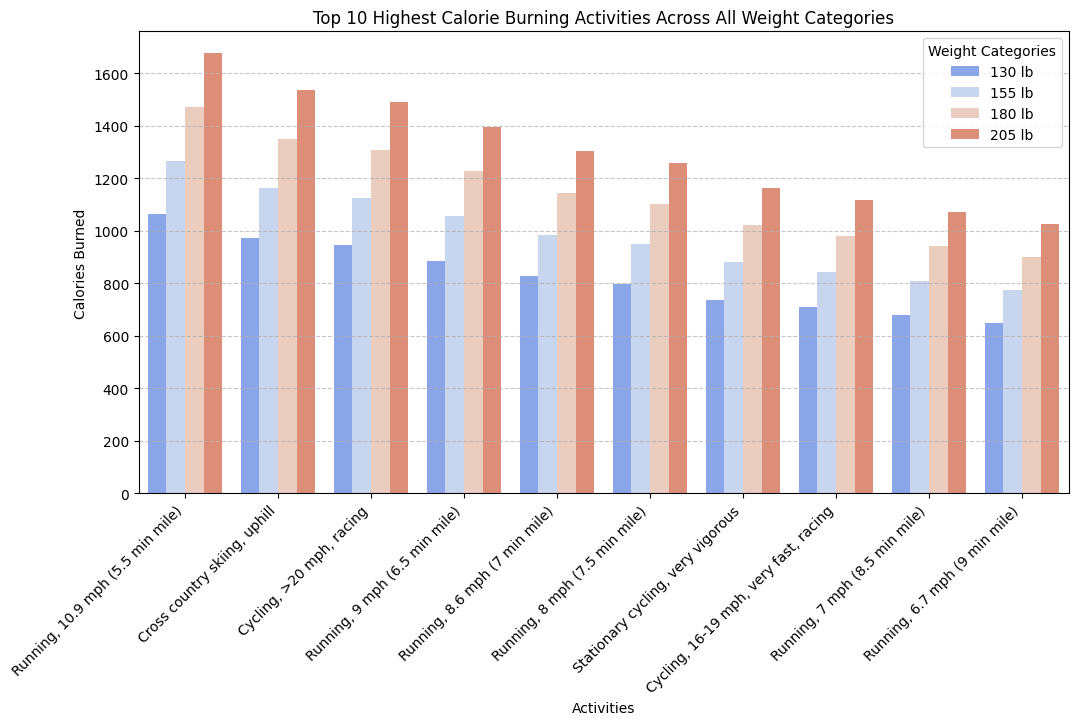

In [24]:
# Select the top 10 highest calorie-burning activities based on the 205 lb category
top_10_activities = calories_df.sort_values(by="205 lb", ascending=False).head(10)

# Reset index to make activities a column
top_10_activities = top_10_activities.reset_index()

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot grouped bar chart using seaborn
top_10_melted = top_10_activities.melt(id_vars=["Excercises"], 
                                       value_vars=["130 lb", "155 lb", "180 lb", "205 lb"],
                                       var_name="Weight Category", value_name="Calories Burned")

sns.barplot(data=top_10_melted, x="Excercises", y="Calories Burned", hue="Weight Category", palette="coolwarm")

# Customize the plot
plt.title("Top 10 Highest Calorie Burning Activities Across All Weight Categories")
plt.xlabel("Activities")
plt.ylabel("Calories Burned")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Weight Categories")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

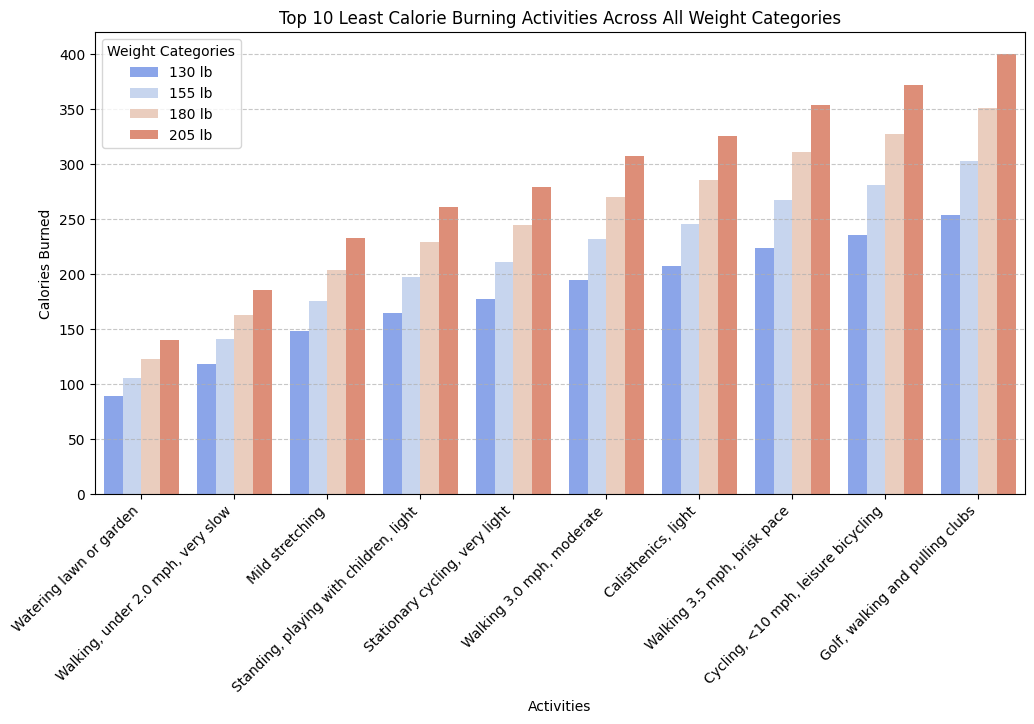

In [25]:
# Select the top 10 least calorie-burning activities based on the 205 lb category
bottom_10_activities = calories_df.sort_values(by="205 lb", ascending=True).head(10)

# Reset index to make activities a column
bottom_10_activities = bottom_10_activities.reset_index()

# Set up the figure size
plt.figure(figsize=(12, 6))

# Convert the data into long format for grouped bar plotting
bottom_10_melted = bottom_10_activities.melt(id_vars=["Excercises"], 
                                             value_vars=["130 lb", "155 lb", "180 lb", "205 lb"],
                                             var_name="Weight Category", value_name="Calories Burned")

# Create the grouped bar chart
sns.barplot(data=bottom_10_melted, x="Excercises", y="Calories Burned", hue="Weight Category", palette="coolwarm")

# Customize the plot
plt.title("Top 10 Least Calorie Burning Activities Across All Weight Categories")
plt.xlabel("Activities")
plt.ylabel("Calories Burned")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Weight Categories")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

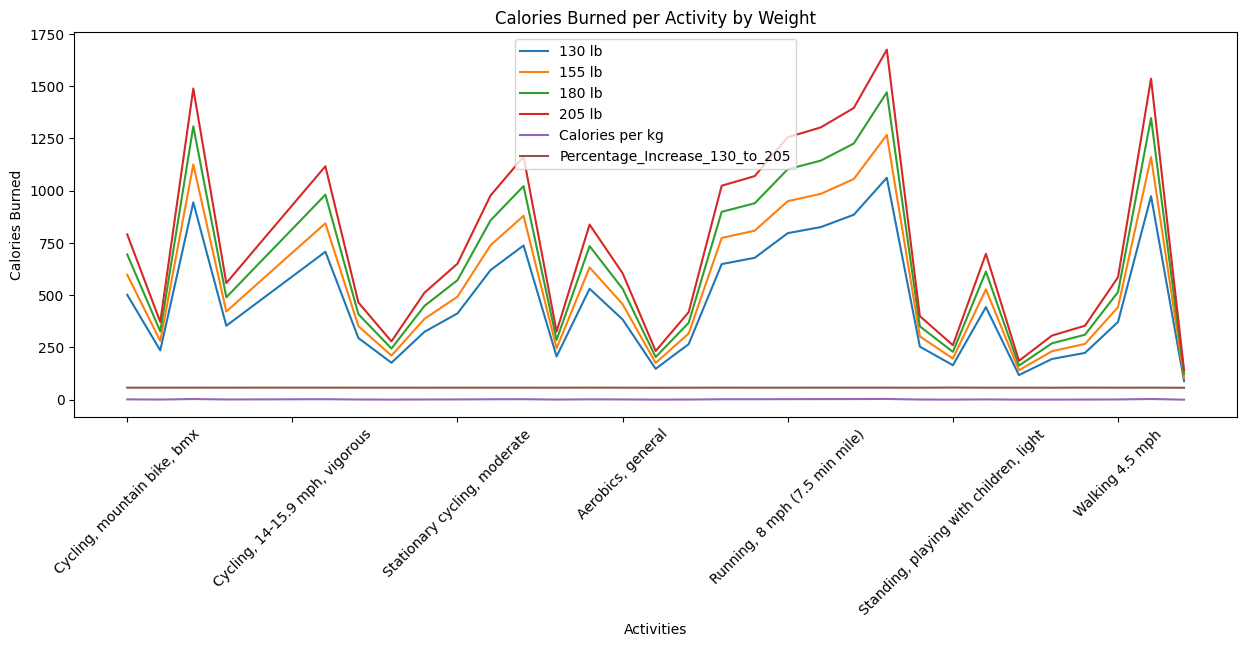

In [26]:
# Line chart: Show how calorie burn changes with weight.
calories_df.plot(title="Calories Burned per Activity by Weight", ylabel="Calories Burned", xlabel="Activities", figsize=(15, 5))
rotated_xticks = plt.xticks(rotation=45)
plt.show()

6. Trend Analysis

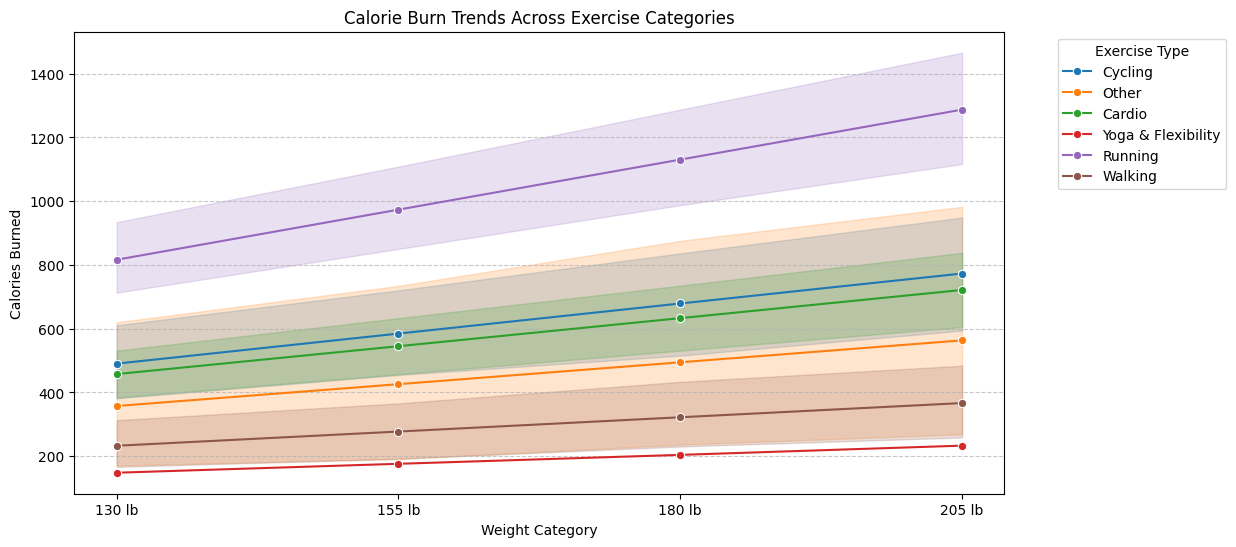

In [27]:
# Melt the DataFrame for better visualization
melted_df = calories_df.melt(
    id_vars=["Exercise_Category"], 
    value_vars=["130 lb", "155 lb", "180 lb", "205 lb"],
    var_name="Weight Category", 
    value_name="Calories Burned"
)

# Plot trend lines for each exercise category
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x="Weight Category", y="Calories Burned", hue="Exercise_Category", marker="o")
plt.title("Calorie Burn Trends Across Exercise Categories")
plt.xlabel("Weight Category")
plt.ylabel("Calories Burned")
plt.legend(title="Exercise Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


7. Most Efficient Workouts for Different Goals

In [28]:
# Find Exercises With the Most Variability
calories_df["Calorie_Variability"] = calories_df[["130 lb", "155 lb", "180 lb", "205 lb"]].std(axis=1)
calories_df.sort_values(by="Calorie_Variability", ascending=False).head(10)

,130 lb,155 lb,180 lb,205 lb,Calories per kg,Exercise_Category,Percentage_Increase_130_to_205,Calorie_Variability
Excercises,,,,,,,,
"Running, 10.9 mph (5.5 min mile)",1062.0,1267.0,1471.0,1675.0,3.71,Running,57.721281,263.750355
"Cross country skiing, uphill",974.0,1161.0,1348.0,1536.0,3.40,Other,57.700205,241.803467
"Cycling, >20 mph, racing",944.0,1126.0,1308.0,1489.0,3.29,Cycling,57.733051,234.573904
"Running, 9 mph (6.5 min mile)",885.0,1056.0,1226.0,1396.0,3.09,Running,57.740113,219.856582
"Running, 8.6 mph (7 min mile)",826.0,985.0,1144.0,1303.0,2.88,Running,57.748184,205.268117
"Running, 8 mph (7.5 min mile)",797.0,950.0,1103.0,1256.0,2.78,Running,57.590966,197.522151
"Stationary cycling, very vigorous",738.0,880.0,1022.0,1163.0,2.57,Cycling,57.588076,182.934187
"Cycling, 16-19 mph, very fast, racing",708.0,844.0,981.0,1117.0,2.47,Cycling,57.768362,176.091832
"Running, 7 mph (8.5 min mile)",679.0,809.0,940.0,1070.0,2.37,Running,57.584683,168.345874


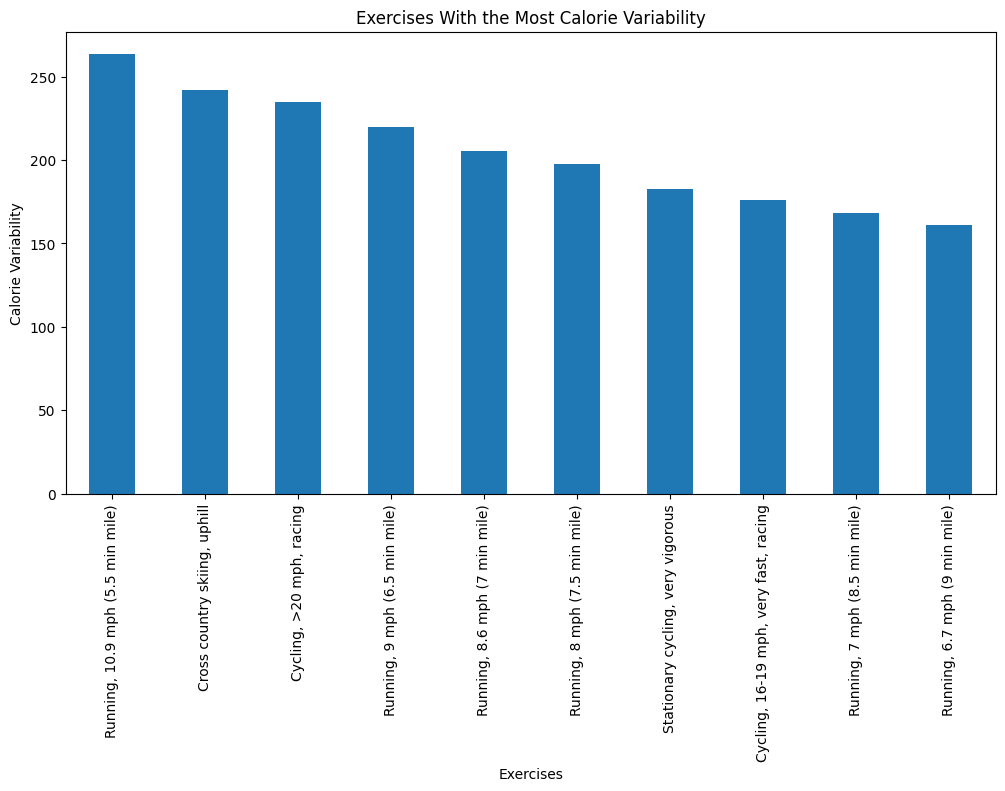

In [29]:
# plot the exercises with the most variability
plt.figure(figsize=(12, 6))
calories_df["Calorie_Variability"].sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Exercises With the Most Calorie Variability")
plt.xlabel("Exercises")
plt.ylabel("Calorie Variability")
plt.show()

In [30]:
# Get the exercises with the least variability
least_variable_exercises = calories_df.nsmallest(10, "Calorie_Variability")

# Display the results
print("Exercises with Least Variability in Calorie Burn:")
print(least_variable_exercises)


Exercises with Least Variability in Calorie Burn:
                                        130 lb  155 lb  180 lb  205 lb  \
Excercises                                                               
Watering lawn or garden                   89.0   106.0   123.0   140.0   
Walking, under 2.0 mph, very slow        118.0   141.0   163.0   186.0   
Mild stretching                          148.0   176.0   204.0   233.0   
Standing, playing with children, light   165.0   197.0   229.0   261.0   
Stationary cycling, very light           177.0   211.0   245.0   279.0   
Walking 3.0 mph, moderate                195.0   232.0   270.0   307.0   
Calisthenics, light                      207.0   246.0   286.0   326.0   
Walking 3.5 mph, brisk pace              224.0   267.0   311.0   354.0   
Cycling, <10 mph, leisure bicycling      236.0   281.0   327.0   372.0   
Golf, walking and pulling clubs          254.0   303.0   351.0   400.0   

                                        Calories per kg   Exe

C:\Users\kashi\AppData\Local\Temp\ipykernel_24100\810289792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_variable_exercises, x=least_variable_exercises.index, y="Calorie_Variability", palette="viridis")


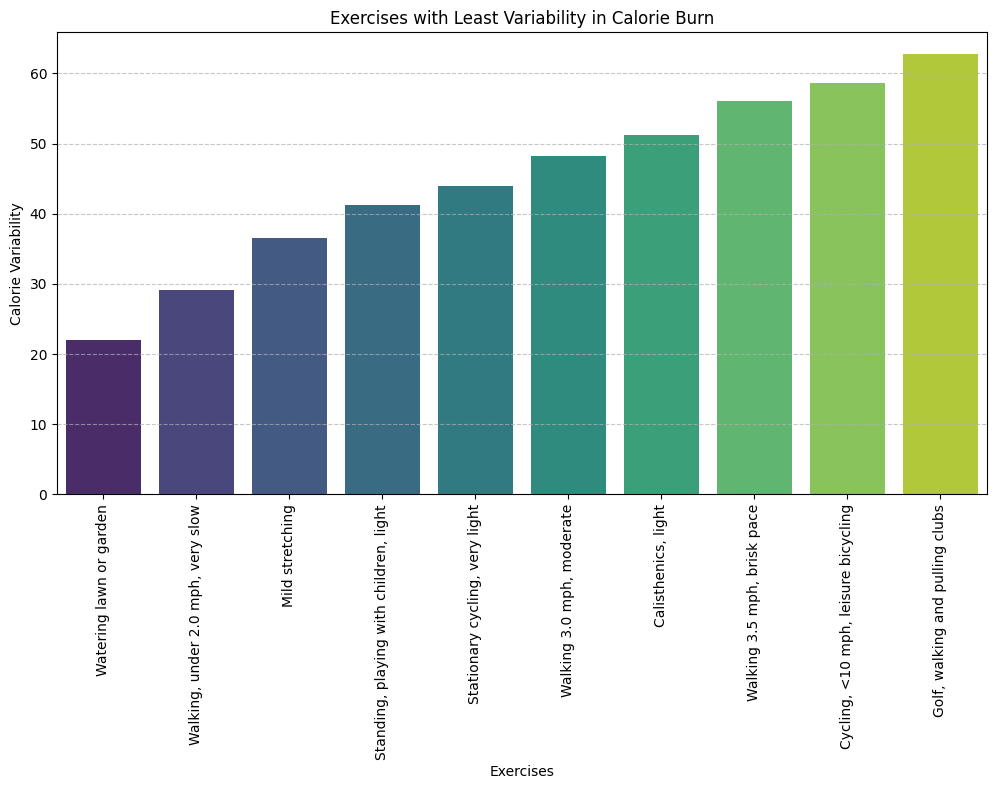

In [31]:
# plot the exercises with the least variability
plt.figure(figsize=(12, 6))
sns.barplot(data=least_variable_exercises, x=least_variable_exercises.index, y="Calorie_Variability", palette="viridis")
plt.title("Exercises with Least Variability in Calorie Burn")
plt.xlabel("Exercises")
plt.ylabel("Calorie Variability")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Find the Most Efficient Exercises by Category

 Identify exercises that burn the most calories within each type.

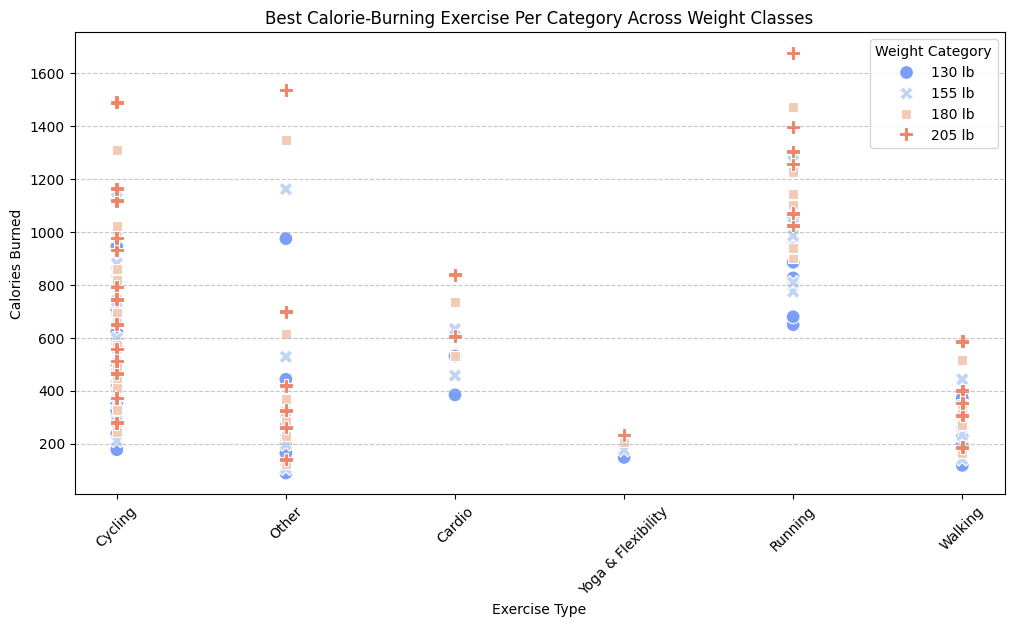

In [32]:
# Melt the DataFrame to long format
melted_df = calories_df.melt(
    id_vars=["Exercise_Category"], 
    value_vars=["130 lb", "155 lb", "180 lb", "205 lb"], 
    var_name="Weight Category", 
    value_name="Calories Burned"
)

# Plot scatterplot for all weight classes
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=melted_df["Exercise_Category"], 
    y=melted_df["Calories Burned"], 
    hue=melted_df["Weight Category"], 
    style=melted_df["Weight Category"], 
    palette="coolwarm", 
    s=100
)

# Customize the plot
plt.title("Best Calorie-Burning Exercise Per Category Across Weight Classes")
plt.xlabel("Exercise Type")
plt.ylabel("Calories Burned")
plt.xticks(rotation=45)
plt.legend(title="Weight Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


Conclusions & Summary

Key Findings:

✅ Calorie Burn Varies by Exercise Type

* The highest calorie-burning exercises are:
    * Running at 10.9 mph (5.5 min mile)
    * Cross-Country Skiing (Uphill)
    * Cycling at >20 mph

* The lowest calorie-burning exercises include:
    * Mild Stretching
    * Walking (very slow)
    * Stationary Cycling (very light)

✅ Impact of Weight on Calorie Burn

* Calorie burn increases as weight increases across all activities.
* Percentage increase from 130 lb to 205 lb is highest for:
    * Running
    * Stair Climbing
    * Cycling (High Speed)

✅ Most & Least Efficient Exercises

* Most Efficient exercises for burning calories (highest Calories per kg):
    * Running (10.9 mph)
    * Cross-country skiing
    * Cycling (high intensity)
    
* Least Efficient exercises (lowest Calories per kg):
    * Mild stretching
    * Golf (walking)
    * Light household activities

✅ Exercise Variability & Predictability

* High-Variability Exercises (inconsistent calorie burn):
    * Running
    * High-speed cycling
    * Stair climbing
* Low-Variability Exercises (predictable calorie burn):
    * Mild stretching
    * Golf
    * Walking (steady pace)

Conclusion:

This analysis provides data-driven insights into how different exercises impact calorie burn across body weight classes.

🏃 Running, Cycling, and High-Intensity Workouts are best for maximum calorie expenditure

🧘 Yoga, Walking, and Light Activities provide consistent, predictable burns for flexibility & stress relief.

By understanding efficiency, variability, and calorie burn trends, individuals can customize workouts for:

    ✅ Weight loss

    ✅ Strength training

    ✅ Cardio health

    ✅ General fitness

This study helps individuals optimize their fitness routines based on personal goals, body weight, and exercise preferences.